### Initialization

In [1]:
# load libraries
import glob
import pandas as pd
import os

In [2]:
# set directory
root_dir = "C:/Users/Shenc/Documents/Data Analytics/Interview/comfortdelgro/2009/"
destination = "C:/Users/Shenc/Documents/Data Analytics/Interview/comfortdelgro/Extract Files/"

### Import Dataset

In [3]:
# initiate an empty list
list=[]

# loop through a list of file names
for filename in glob.iglob(root_dir + '**/**/***.txt.gz', recursive=False):
    list.append(filename)

In [4]:
# count items in the list
len(list)

15770

In [5]:
# check for duplicates

# import collections
# print([item for item, count in collections.Counter(list).items() if count > 1])

In [6]:
# initiate an empty list
df_list = []

# unzip all txt files and convert into pandas df
for i in list:
    df = pd.read_csv(i, compression='gzip', header=0, sep=None, quotechar='"', error_bad_lines=False, 
                     engine = 'python', index_col=False, encoding = "utf_8")
    df_list.append(df)

In [7]:
len(df_list)

15770

### Data Transformation 

In [8]:
# concatenate to a single df
df_con = pd.concat(df_list)

In [9]:
df_con.head()

,﻿Date,StoreID,StoreName,ProductID,ProductName,Color,Size,Manufacturer,OnHandQuantity,OnOrderQuantity,SafetyStockQuantity,UnitCost,DaysInStock,MinDayInStock,MaxDayInStock
0,2009-01-03,1,Contoso Seattle No.1 Store,6,Contoso 2G MP3 Player E200 Black,Black,1.6 x 0.4 x 3.7,"Contoso, Ltd",19,0,24,11.00,60,43,76
1,2009-01-03,1,Contoso Seattle No.1 Store,29,Contoso 32GB Video MP3 Player M3200 White,White,1 x 1.6 x 3.7,"Contoso, Ltd",19,0,12,84.49,58,11,97
2,2009-01-03,1,Contoso Seattle No.1 Store,31,Contoso 32GB Video MP3 Player M3200 Orange,Orange,2.6 x 2.5 x 0.6,"Contoso, Ltd",19,0,6,84.49,63,17,111
3,2009-01-03,1,Contoso Seattle No.1 Store,51,WWI 2GB Pulse Smart pen M100 Blue,Blue,6 x 0.5 x 0.5,Wide World Importers,19,0,6,91.95,79,12,86
4,2009-01-03,1,Contoso Seattle No.1 Store,54,WWI 4GB Video Recording Pen X200 Red,Red,5.1 x 2.4 x 3.9,Wide World Importers,23,4,18,98.07,30,30,71


In [44]:
# create a new df with selected columns
df_new = df_con.iloc[:, [0, 1, 3, 8, 9, 12, 13, 14]]

In [45]:
# rename columns
df_new.columns = ["DateID", "StoreID", "ProductID", "OnHandQty", "OnOrderQty", "DaysInStock", "MinDayInStock", "MaxDayInStock"]

In [46]:
pd.options.mode.chained_assignment = None # suppress warning

# update "Date" column to type date
df_new["DateID"] = pd.to_datetime(df_new["DateID"], format="%Y-%m-%d")

In [47]:
# insert column "Month"
df_new['month'] = df_new['DateID'].dt.month

In [41]:
df_new.shape

(1547897, 9)

In [42]:
df_new.head()

,DateID,StoreID,ProductID,OnHandQty,OnOrderQty,DaysInStock,MinDayInStock,MaxDayInStock,month
0,2009-01-03,1,6,19,0,60,43,76,1
1,2009-01-03,1,29,19,0,58,11,97,1
2,2009-01-03,1,31,19,0,63,17,111,1
3,2009-01-03,1,51,19,0,79,12,86,1
4,2009-01-03,1,54,23,4,30,30,71,1


In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547897 entries, 0 to 386
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   DateID         1547897 non-null  datetime64[ns]
 1   StoreID        1547897 non-null  int64         
 2   ProductID      1547897 non-null  int64         
 3   OnHandQty      1547897 non-null  int64         
 4   OnOrderQty     1547897 non-null  int64         
 5   DaysInStock    1547897 non-null  int64         
 6   MinDayInStock  1547897 non-null  int64         
 7   MaxDayInStock  1547897 non-null  int64         
 8   month          1547897 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 118.1 MB


### Export Dataset

In [9]:
# print all csv to dirctory
for index, dataset in enumerate(df_list):

    # Export to CSV
    filepath = os.path.join(destination, 'dataset_'+str(index)+'.csv')
    dataset.to_csv(filepath)

### Exploratory Analysis

In [90]:
# load libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [111]:
# objective: dataset overview (no. of products in each store)
print("Number of unique ProductID is " + str(df_new["ProductID"].nunique()))
print("Number of unique StoreID is " + str(df_new["StoreID"].nunique()))

Number of unique ProductID is 2508
Number of unique StoreID is 306


In [112]:
# count number of products per store
df_prodcount = df_new.groupby('StoreID')['ProductID'].nunique()
df_prodcount = pd.DataFrame(df_prodcount).reset_index()
df_prodcount.columns = ['StoreID', 'ProdCount']
df_prodcount.head()

,StoreID,ProdCount
0,1,850
1,2,884
2,3,871
3,4,877
4,5,890


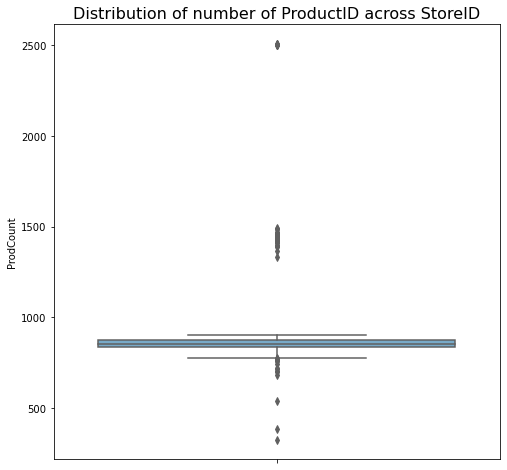

In [127]:
# set figure size in inches
rcParams['figure.figsize'] = 8,8

ax = sns.boxplot(y = df_prodcount["ProdCount"], palette="Blues")
ax.set_title('Distribution of number of ProductID across StoreID', fontsize=16);
plt.show()

In [109]:
# stores with product count more than 1500
df_prodcount[(df_prodcount.ProdCount > 1500)]

,StoreID,ProdCount
196,199,2504
197,200,2505
301,306,2504
302,307,2506
303,308,2504
304,309,2505
305,310,2504


In [110]:
# stores with product count less than 500
df_prodcount[(df_prodcount.ProdCount < 500)]

,StoreID,ProdCount
63,65,383
220,223,326


In [158]:
# objective: dataset overview (total inventory in each store per month)

# count number of inventory per store per month
df_invcount = df_new.groupby(['StoreID', 'month'])['OnHandQty'].sum()
df_invcount = pd.DataFrame(df_invcount).reset_index()
df_invcount.columns = ['StoreID', 'month', 'Inv']
df_invcount.head()

,StoreID,month,Inv
0,1,1,11042
1,1,2,7746
2,1,3,6608
3,1,4,7056
4,1,5,9698


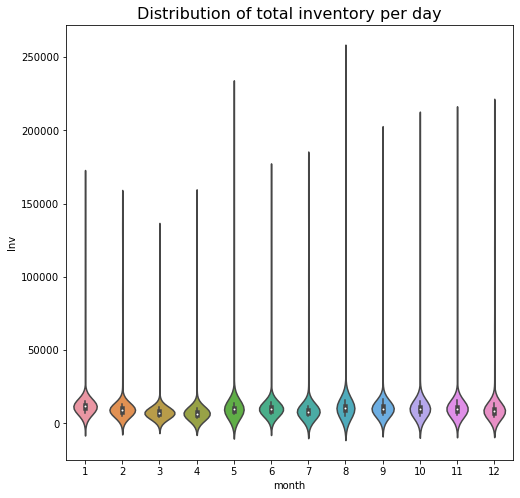

In [159]:
bx = sns.violinplot(x="month", y="Inv", split=True, data=df_invcount)
bx.set_title('Distribution of total inventory per month', fontsize=16);

In [169]:
# Top 10 Product ID by inventory volume
df_prodvol = df_new.groupby('ProductID')['OnHandQty'].sum()
df_prodvol = pd.DataFrame(df_prodvol).reset_index()
df_prodvol.columns = ['ProductID', 'Inv']
df_prodvol.head()

,ProductID,Inv
0,1,19563
1,2,13486
2,3,17234
3,4,16395
4,5,18547


In [184]:
sort_vol = df_prodvol.sort_values(['Inv'], ascending=False).groupby('ProductID').sum()
sort_vol.nlargest(10, ['Inv']) 

,Inv
ProductID,
2495,363362
2496,336906
2494,333082
2511,312008
2490,309649
2517,305359
2516,304232
2491,299270
2510,297231


In [150]:
# objective: to identify slow moving products (by productID)
# get slow MaxDayInStock in the 75% percentile
df_new[["DaysInStock", "MinDayInStock", "MaxDayInStock"]].describe()

,DaysInStock,MinDayInStock,MaxDayInStock
count,1.547897e+06,1.547897e+06,1.547897e+06
mean,4.599223e+01,3.187572e+01,8.958652e+01
std,2.291037e+01,1.587066e+01,1.732875e+01
min,5.000000e+00,5.000000e+00,6.000000e+01
25%,3.000000e+01,1.800000e+01,7.500000e+01
50%,4.500000e+01,3.200000e+01,9.000000e+01
75%,6.100000e+01,4.600000e+01,1.050000e+02
max,1.190000e+02,5.900000e+01,1.190000e+02


In [185]:
# Top 10 inventory by maxday in stock

sort_day = df_new.sort_values(['MaxDayInStock'], ascending=False).groupby('ProductID').sum()
sort_day.nlargest(10, ['MaxDayInStock']) 

,StoreID,OnHandQty,OnOrderQty,DaysInStock,MinDayInStock,MaxDayInStock,month
ProductID,,,,,,,
377,306985,38267,3363,88419,62188,178473,12721
371,291972,38339,2840,86007,57685,170545,11853
401,292466,58435,6679,83637,63333,169930,12067
407,289903,37776,3374,83720,58264,169680,11780
347,297887,37174,3380,79304,59684,168520,12066
345,284741,36968,3180,83506,59255,168319,11730
393,291878,37316,3248,84042,58583,168234,12091
359,288240,36523,3282,81230,59871,167955,11323
381,300985,36366,3144,84640,58521,167648,11397
